In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/final_cleaned_dataset/cleaned_annex.csv')
df.sample(5)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),CustomerId,Item Name,Category Name,Loss Rate
403709,2021-08-30,17:05:58.968,102900011008522,1.121,7.0,sale,No,193510.0,Sweet Chinese Cabbage,Flower,9.43
164012,2020-12-06,18:59:23.298,102900005115960,2.143,1.0,sale,No,306314.0,Chinese Cabbage,Flower,22.27
757681,2023-01-13,16:55:59.503,106949711300259,1.000,4.9,sale,No,272575.0,Broccoli,Cabbage,9.26
241164,2021-02-22,17:41:30.621,102900051004294,0.369,29.8,sale,No,710329.0,Green Line Pepper,Capsicum,7.80
140228,2020-11-12,16:18:50.045,102900005115960,1.377,1.4,sale,No,482459.0,Chinese Cabbage,Flower,22.27


In [3]:
df['Sale or Return'].value_counts()

Sale or Return
sale      878040
return       461
Name: count, dtype: int64

In [4]:
df = df.drop(['Date', 'Time', 'Item Code', 'CustomerId', 'Sale or Return'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878501 entries, 0 to 878500
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Quantity Sold (kilo)         878501 non-null  float64
 1   Unit Selling Price (RMB/kg)  878501 non-null  float64
 2   Discount (Yes/No)            878501 non-null  object 
 3   Item Name                    878501 non-null  object 
 4   Category Name                878501 non-null  object 
 5   Loss Rate                    878501 non-null  float64
dtypes: float64(3), object(3)
memory usage: 40.2+ MB


In [6]:
df.isnull().sum()

Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Discount (Yes/No)              0
Item Name                      0
Category Name                  0
Loss Rate                      0
dtype: int64

In [7]:
for i in range(df.shape[0]):
    if df['Discount (Yes/No)'].values[i] == 'Yes':
        df['Discount (Yes/No)'].values[i] = 1
    else:
        df['Discount (Yes/No)'].values[i] = 0
        
df['Discount (Yes/No)'] = df['Discount (Yes/No)'].astype(int)
df.sample(5)  

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Discount (Yes/No),Item Name,Category Name,Loss Rate
844417,0.210,7.2,0,Eggplant (2),Solanum,6.07
573740,0.505,4.0,0,Xiaoqingcai (1),Flower,10.33
295928,0.551,8.0,0,Luosi Pepper,Capsicum,10.18
867859,1.000,4.5,0,Changxianqie,Solanum,6.90
11284,0.217,11.3,1,Luosi Pepper,Capsicum,10.18


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878501 entries, 0 to 878500
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Quantity Sold (kilo)         878501 non-null  float64
 1   Unit Selling Price (RMB/kg)  878501 non-null  float64
 2   Discount (Yes/No)            878501 non-null  int64  
 3   Item Name                    878501 non-null  object 
 4   Category Name                878501 non-null  object 
 5   Loss Rate                    878501 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 40.2+ MB


In [9]:
df['Discount (Yes/No)'].value_counts()

Discount (Yes/No)
0    831135
1     47366
Name: count, dtype: int64

In [10]:
df.iloc[:,[0, 1, 2, 5]].corr()

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Discount (Yes/No),Loss Rate
Quantity Sold (kilo),1.000000,-0.413164,0.088619,-0.017258
Unit Selling Price (RMB/kg),-0.413164,1.000000,-0.072037,-0.022335
Discount (Yes/No),0.088619,-0.072037,1.000000,-0.038064
Loss Rate,-0.017258,-0.022335,-0.038064,1.000000


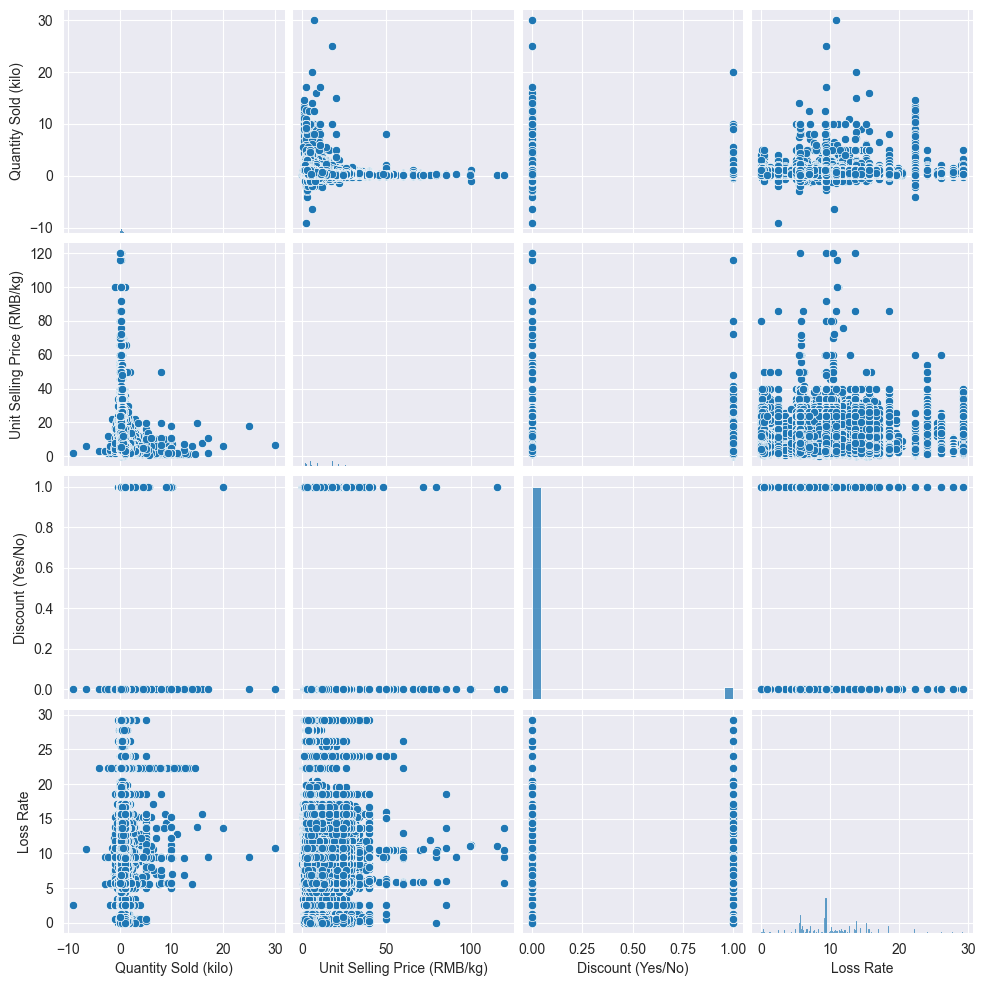

In [11]:
sb.pairplot(df.iloc[:,[0, 1, 2, 5]])

In [12]:
df.head()

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Discount (Yes/No),Item Name,Category Name,Loss Rate
0,0.396,7.6,0,Paopaojiao (Jingpin),Capsicum,7.08
1,0.849,3.2,0,Chinese Cabbage,Flower,22.27
2,0.409,7.6,0,Paopaojiao (Jingpin),Capsicum,7.08
3,0.421,10.0,0,Shanghaiqing,Flower,14.43
4,0.539,8.0,0,Caixin,Flower,13.70


In [13]:
df['Discount (Yes/No)'] = df['Discount (Yes/No)'].astype(str)

In [14]:
df = pd.get_dummies(df)
df.shape

(878501, 253)

In [15]:
df.sample(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Loss Rate,Discount (Yes/No)_0,Discount (Yes/No)_1,Item Name_7 Colour Pepper (1),Item Name_7 Colour Pepper (2),Item Name_7 Colour Pepper (Bag),Item Name_Agaricus Bisporus (Bag),Item Name_Agaricus Bisporus (Box),...,Item Name_Zhijiang Red Bolt (Bag),Item Name_Zhimaxiancai,Item Name_Zhuyecai,Item Name_Zhuyecai (Bag),Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower,Category Name_Solanum
503416,0.483,16.0,6.90,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
248560,0.351,8.0,6.07,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
362450,0.086,14.0,5.86,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
325168,0.414,3.4,13.62,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
253808,0.590,4.6,12.81,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
